# Aprendizaje Evolutivo

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Libraries for displaying and saving the detailed Decision Tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image, display
import pydotplus


In [2]:
 # Create Decision Tree classifer object
model = DecisionTreeClassifier()

In [3]:
def decisionTreeGenerator(criteria, plot, dfx, dfy):

    genome2Use = [bool(item) for item in criteria]
    col2Use = dfx[dfx.columns[genome2Use]].columns
    X = dfx[col2Use]
    y = dfy

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Train Decision Tree Classifer
    model.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = model.predict(X_test)

    if plot:
        dot_data = StringIO()
        export_graphviz(model, out_file=dot_data,
                        filled=True, rounded=True,
                        special_characters=True,feature_names = col2Use,class_names=['Remote','In-Person'])
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
        # graph.write_png('DecisionTreeAgent.png')
        img = Image(graph.create_png())
        display(img)

    return metrics.accuracy_score(y_test, y_pred)



In [4]:
def fitness_score(iterations, dfx, dfy) :
    global populations, best
    fit_value = []
    fit_score=[]

    for i in range(iterations):
        chromosome_value = boolArrGen(lenGenome)
        fit_value.append(decisionTreeGenerator(chromosome_value, False, dfx, dfy))

    fit_value, populations = zip(*sorted(zip(fit_value, populations) , reverse = True))
    best= fit_value[0]


In [5]:
def selectparent():
    global parents
    parents=populations[0:2]

In [6]:
def crossover() :
    global parents

    while sum(parents[0]) <= 0 and sum(parents[1]) <= 0:
        cross_point = random.randint(0,lenGenome)
        parents = parents + tuple([(parents[0][0:cross_point +1] + parents[1][cross_point+1:lenGenome])])
        parents = parents + tuple([(parents[1][0:cross_point +1] + parents[0][cross_point+1:lenGenome])])

In [7]:
def mutation() :
    global populations, parents
    mute = random.randint(0,49)
    if mute == 20 :
        x = random.randint(0, 1)
        y = random.randint(0,lenGenome-1)
        parents[x][y] = 1-parents[x][y]

        while parents[x][y] <= 0:
            x = random.randint(0,1)
            y = random.randint(0,lenGenome-1)
            parents[x][y] = 1-parents[x][y]

    populations = parents

In [8]:
def boolArrGen(sizeR):
    initial_arr = [True, False]
    arr = [False]

    while sum(arr) <= 0:
        arr = np.random.choice(initial_arr, size=sizeR)

    bool_arr = list(map(bool, arr))

    return bool_arr

In [9]:
url = 'https://raw.githubusercontent.com/Kassoomy/Portfolio/main/Feature%20Engineering%20(GA)/Data/jobs_in_data_2024%20-%20Base.csv'
df = pd.read_csv(url)

col_names = df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13986 entries, 0 to 13985
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Work-year                           13986 non-null  int64 
 1   Entry-level                         13986 non-null  int64 
 2   Executive                           13986 non-null  int64 
 3   Senior                              13986 non-null  int64 
 4   Mid-level                           13986 non-null  int64 
 5   Freelance                           13986 non-null  int64 
 6   Full-time                           13986 non-null  int64 
 7   Contract                            13986 non-null  int64 
 8   Part-time                           13986 non-null  int64 
 9   Salary-currency-USD                 13986 non-null  int64 
 10  work_setting                        13986 non-null  object
 11  Company-Locate-USA                  13986 non-null  in

In [10]:
X = df.drop('work_setting', axis='columns')
df['work_setting_processed'] = [1 if i == "Remote" else 0 for i in df['work_setting']] #Change the categorical result to a binary column
y = df['work_setting_processed']

Initial Population = [[False, False, False, True, False, False, True, False, False, True, False, False, True, False, True, True, False, False, True, False, True, True, True, False, True, False, True], [True, True, True, True, True, True, False, False, True, True, True, True, False, True, True, True, True, False, False, False, False, True, True, False, False, False, False], [False, True, False, True, True, True, True, False, False, False, False, False, False, True, False, False, False, True, True, False, True, True, True, True, True, True, False], [True, True, False, False, True, True, False, False, True, False, True, False, True, False, True, True, False, False, True, False, True, False, True, False, False, True, True], [True, False, True, True, False, True, True, False, True, True, True, True, True, True, False, True, False, True, False, True, True, False, False, True, True, False, False], [False, False, False, True, False, False, False, False, True, True, False, False, True, False, T

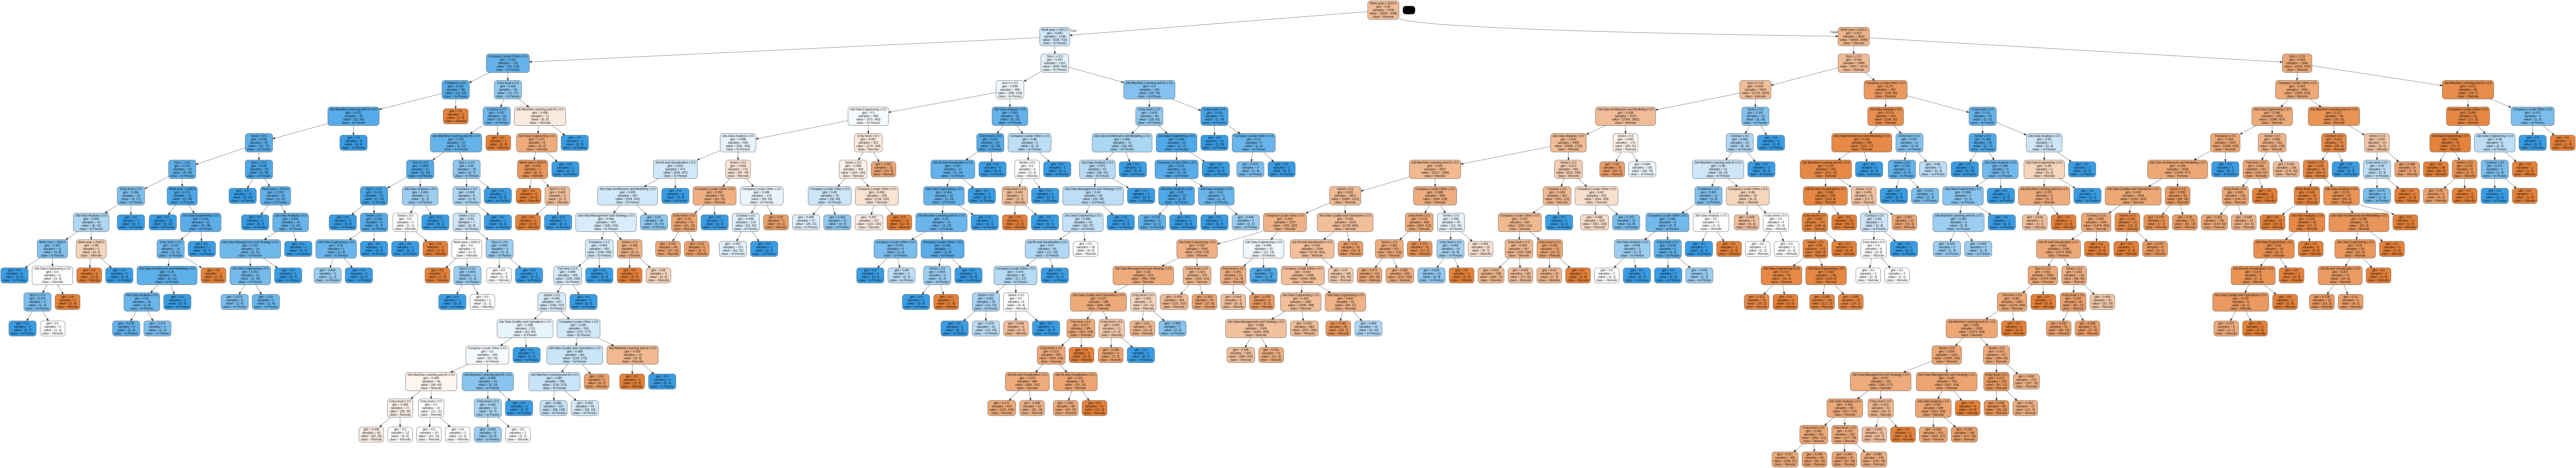

Incumbent solution found after 501 generations: Accuracy 0.694232602478551 with Genome [True, True, False, True, False, True, False, True, True, False, False, False, False, True, False, True, True, False, True, True, True, True, False, True, True, False, True]
Refering to the vairables ['Work-year' 'Entry-level' 'Senior' 'Freelance' 'Contract' 'Part-time'
 'Company-Locate-Other' 'Size-L' 'Size-S' 'Job-BI-and-Visualization'
 'Job-Data-Architecture-and-Modeling' 'Job-Data-Analysis'
 'Job-Data-Engineering' 'Job-Data-Quality-and-Operations'
 'Job-Machine-Learning-and-AI' 'Job-Data-Management-and-Strategy'] 


In [15]:
best=-100000
lenGenome = len(X.columns)
populationSize = 32
generations = 0
iterations = 20
bestResults = []
currResult = -1
parents=[]
new_populations = []
populations =([boolArrGen(lenGenome) for i in range(populationSize)])

print(f'Initial Population = {populations}')

while currResult < 0.75 and generations <= 500:
    fitness_score(iterations, X, y)
    selectparent()
    crossover()
    mutation()
    currResult = decisionTreeGenerator(populations[0], False, X, y)
    bestResults.append(currResult)
    generations += 1


finalGenome = [bool(item) for item in populations[0]]
print(f'Incumbent solution found after {generations} generations: Accuracy {decisionTreeGenerator(populations[0], True, X, y)} with Genome {finalGenome}')
print(f'Refering to the vairables {X[X.columns[finalGenome]].columns.values} ')


Incumbent solution found after 1001 generations: Accuracy 0.698045757864633 with Genome [True, True, False, False, False, False, True, True, False, False, False, True, False, False, True, True, False, True, False, False, False, False, False, True, False, True, True]
Refering to the vairables ['Work-year' 'Entry-level' 'Full-time' 'Contract' 'Company-Locate-UK'
 'Size-M' 'Size-L' 'Job-Data-Science-and-Research'
 'Job-Data-Quality-and-Operations' 'Job-Cloud-and-Database'
 'Job-Data-Management-and-Strategy'] 


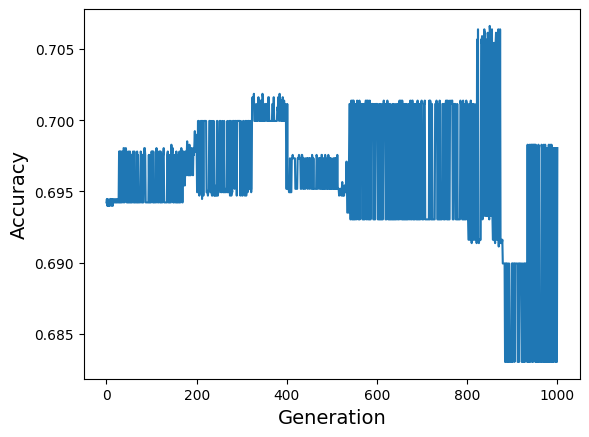

In [12]:
plt.xlabel("Generation", fontsize = 14)
plt.ylabel("Accuracy", fontsize=14)
plt.plot(bestResults)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train Decision Tree Classifer
model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.7035271687321258


In [14]:
columnsUsed = ('Entry-level','Executive','Senior','Contract','Company-Locate-USA'
,'Company-Locate-Canada','Size-M','Size-L','Job-BI-and-Visualization'
,'Job-Data-Architecture-and-Modeling','Job-Leadership-and-Management'
,'Job-Data-Quality-and-Operations','Job-Cloud-and-Database')